# **VM3000 MEMS Project - Progress Tracking**

## Progress Update 1 - 31/07/2020

### Sourcing the RPi Zero W

As discussed with Ben and Melinda during one of my earlier meetings for thesis, sourcing the Raspberry Pi Zero W proved to be one of the initial hurdles of this project. Not only is the Pi Zero W often out of stock, the Raspberry Pi Foundation has limited the sale of one Pi Zero W per customer which makes it all the more difficult to source a stockpile of these boards for testing purposes. 

I conducted a vendor screening on the 17/07/2020 - the Excel file has been uploaded onto SHL teams. Most local vendors out of stock, the remaining vendors were either overseas or sold the Pi Zero W's at unreasonably inflated prices. Luckily I was able to source a Pi Zero W from a friend of mine who had a spare on hand.

### Gathering the necessary components

The following pieces of equipment were purchased for setup of the Pi Zero W:

 - 1x 16GB Micro SD Card (9 AUD)
 - 1x Multicard Reader with USB 2.0 Hub input (17 AUD)
Both items were purchased from Officeworks. 

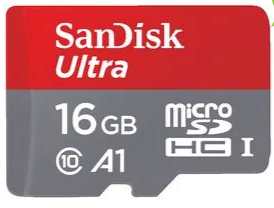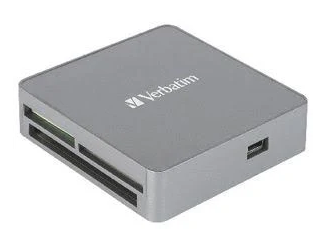

### Setting up the software

In order to access the Pi Zero W directly over USB connection, headless SSH access needed to be setup - the following guide was followed: https://desertbot.io/blog/headless-pi-zero-ssh-access-over-usb-windows?fbclid=IwAR0HHEW8AG63u5XTH_QIqGYqvfIS3r3zvBPypFTo7GvtI566ymInhyD5q8A

Upon completion of this setup, the Pi Zero W is accessible through using a USB to mini-USB cable connection and  SSH login over PuTTY. I have kept  the default username (pi) and changed the password. 

I used the following website as a guide to enable coding directly onto the Pi Zero W: https://learn.sparkfun.com/tutorials/python-programming-tutorial-getting-started-with-the-raspberry-pi/all

### Simple sound detection script

This script was taken from the following website purely for the purposes of exploring the capabilities of the Pi Zero W and familiarising myself with the board.
https://www.instructables.com/id/Sound-Sensor-Raspberry-Pi/
(All credits to the author)

import RPi.GPIO as GPIO
import time

#Setting up GPIO Pin 17
channel = 17
GPIO.setmode(GPIO.BCM)
GPIO.setup(channel, GPIO.IN)

def callback(channel):
    if GPIO.input(channel):
        print("Sound Detected!")
    else:
        print("Sound Detected")
        
GPIO.add_event_detect(channel, GPIO.BOTH, bouncetime = 300)
GPIO.add_event_callback(channel, callback)

while True:
    time.sleep(1)

<b><font color = red> Issues Encountered </font></b>

I initially set up the Pi Zero W on a network which was not my home network nor my phone hotspot network. When attempting to install the RPi.GPIO package I ran into issues downloading the package as the Pi was not connected to the internet. Initially I did not recognise this as the issue, however after several attempts at troubleshooting the solution was found through this thread: https://raspberrypi.stackexchange.com/questions/11631/how-to-setup-multiple-wifi-networks

Within the wpa_supplicant.conf folder, I added 2 WiFi networks: my home WiFi and my iPhone Hotspot. I tested the board was now connected to the internet by pinging www.google.com and verified this by installing the RPi.GPIO package. 

### Building and testing the circuit

Since the final output of my research project involves me building a digital microphone array using the VM3000 piezoelectric MEMS microphones and a PCB, it is important for me to familiarise myself with the practical aspects of circuit-building using the Pi Zero W. In doing so, I sourced the following equipment from the UWA Maker's Lab to play around with:

 - 2x Breadboards
 - 2x Orange LEDs
 - 2x Red LEDs
 - 3x 680 Ohm Resistors
 - 1x CZN-15E Microphone based sound sensor module (https://rarecomponents.com/store/1564)
    
Note that in building the circuit necessary for the above code, only the microphone modules, a single breadboard and a few connection leads were required. The intent behind these pieces of equipment is to produce a microphone circuit and record the sound output. The following GPIO layout was used as reference for the Pi Zero W:

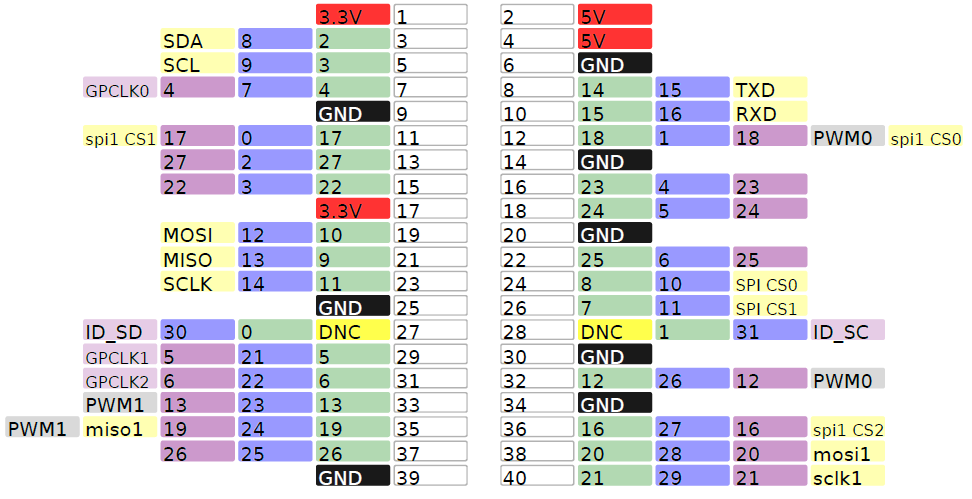



### Practical side of things

3 GPIO pins were used on the Pi Zero W, namely pin 4 (5V), pin 6 (GND) and pin 11 (Digital Input 17) which were connected to the Vcc, GND and OUT pins on the board respectively. This can be seen in the following image:
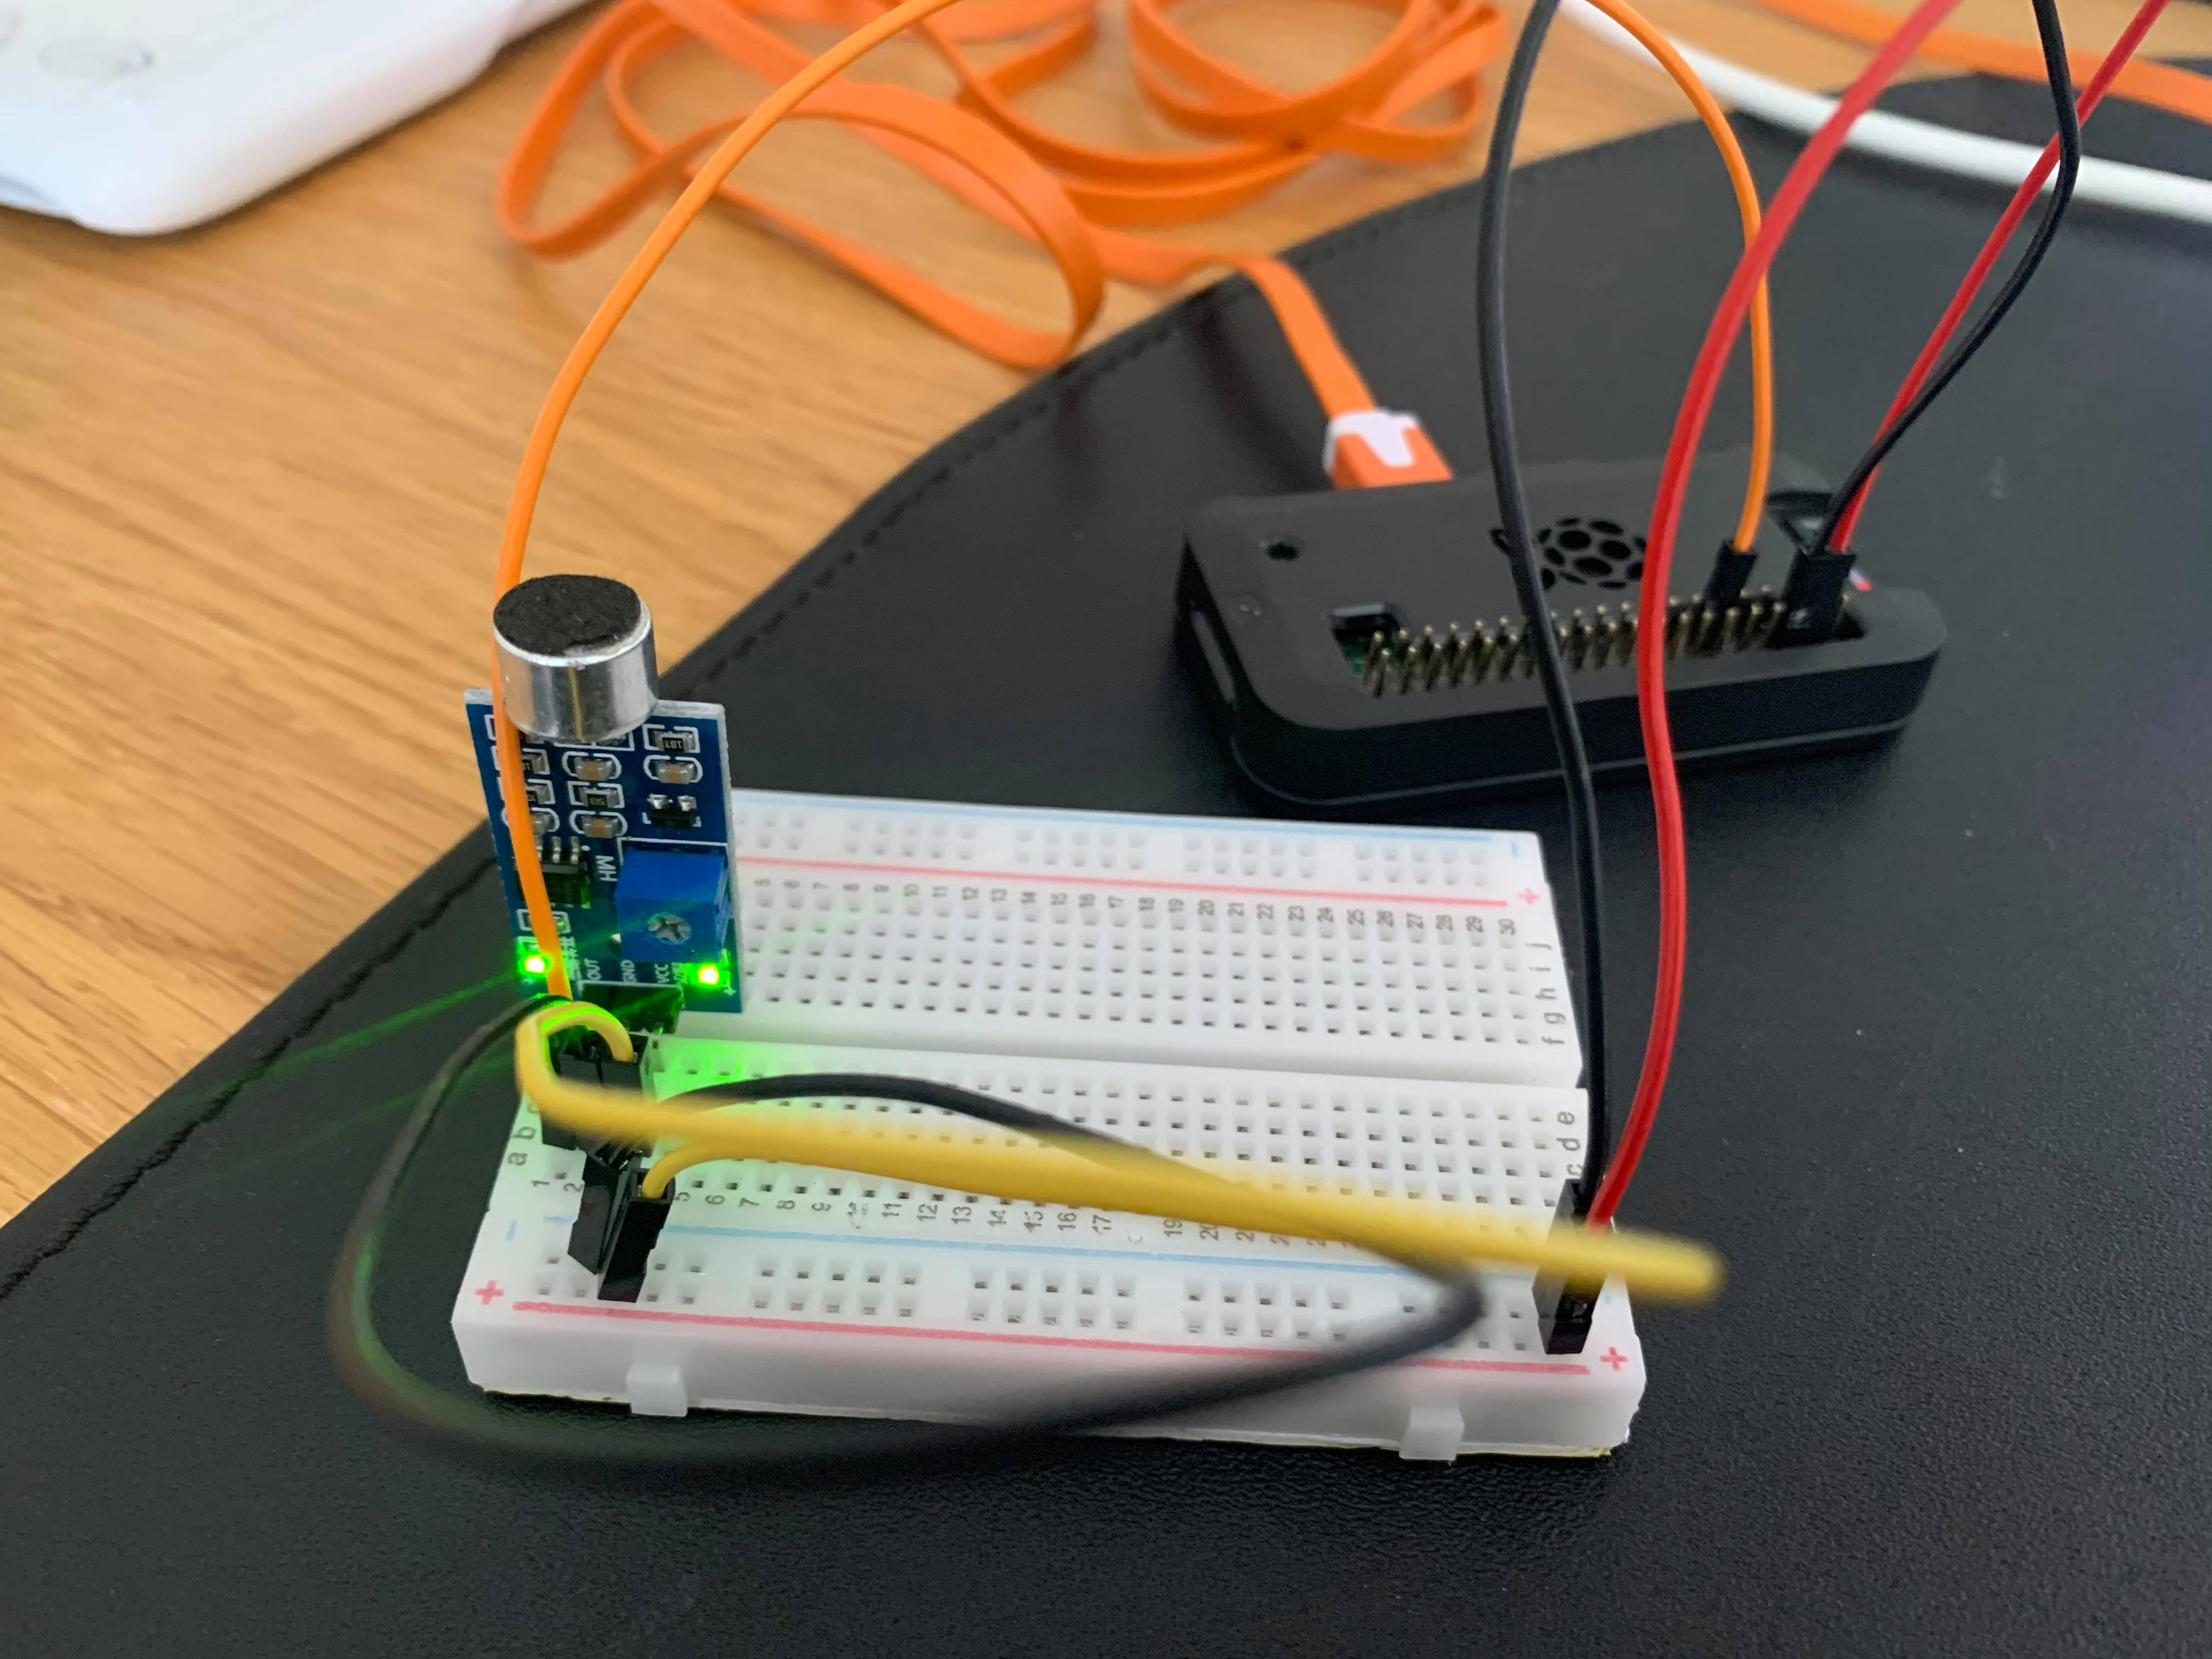

The CZN-15E microphone module contains 2 indicator lights. From the perspective of this image, the right light indicates the module is being powered, and the left light indicates that the microphone is receiving a reading. Note that the microphone module contains an adjustable potentiometer which can be used to change the trigger level (blue box). The output of the module is binary and is HIGH when it reads sound intensity greater than the set trigger level. 

Notice that currently the reading sensor is a constant bright green, this indicates the potentiometer is too sensitive and needed to be adjusted down. With the microphone component facing away from me, turning the adjustor clockwise reduced the trigger level and vice versa. This was done using a Phillips head screwdriver I had at home.

### Recording the results

Now that the potentiometer has been adjusted to the desired trigger level, the circuit was ready to be tested. The following output was produced by the circuit and code following 4 claps infront of the microphone.

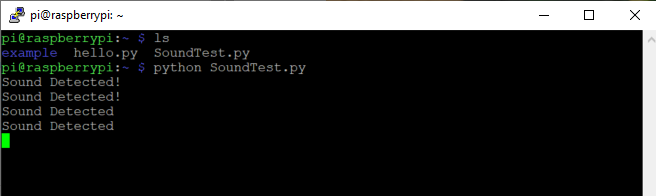


### Extending the code

Now that I have demonstrated basic proficiency in integrating software with hardware, the next step I'd like to pursue is extending the capabilities of the Python script. Currently, it is simply printing a message once the CZN-15E microphone has detected sound. It would be a good learning experience to explore how to convert the dB levels of sound readings and plot them on a graph in real-time.

<b><font color = red> I have put this on hold for now whilst I explore more time-pressing action items </font></b>

## Progress Update 2 - 07/08/2020

### Setting up RPi Zero W SSH passwordless access and Github link


Based on discussions with Ben from the fortnightly MPE catchup 31/07/2020, he recommended I set up SSH passwordless access to be able to remotely access the RPi and make it easier to make upload/edit Python scripts. I used the following guide in setting up <b>remote access SSH </b> this access on my laptop: https://www.raspberrypi.org/documentation/remote-access/ssh/passwordless.md

The commands were entered into Ubuntu from my Windows PC which had been previously set up using Windows Subsystem for Linux (from the Windows Application Store).

Once this setup had been completed, I also set up GitHub connection on the RPi (Thank you Frinze) using the following guide: https://geektechstuff.com/2019/09/09/introduction-to-github-raspberry-pi/ 

The commands were entered also entered into Ubuntu. Now the RPi can access the same repository in which my Jupyter Notebooks will be synced into, and the RPi can easily pull .ipynb files so long as it is connected to the internet and that I am able to SSH login into the RPi.

To access the pi remotely, check pi ip address using "$ hostname -I" on the RPi, then "ssh pi@<ip.address>" and enter key passphrase, include "-v" in ssh command on Ubuntu to get more information on the ssh process if difficulties arise.

Useful links for troubleshooting include:
 - https://askubuntu.com/questions/265982/unable-to-start-sshd
 - https://www.raspberrypi.org/forums/viewtopic.php?t=62326
 
To set up <b> USB SSH access: </b>
 - https://www.raspberrypi.org/downloads/
 - https://www.circuitbasics.com/raspberry-pi-zero-ethernet-gadget/

### Addressing VM3000 PDM and RPi Zero W clockrate

The Vesper MEMS VM3000 Microphones is designed to utilise Pulse Density Modulation as its method of sampling analogue signals and digitising its output, and does so at a bitrate of 1. This means each analogue sample taken by the microphone either maps to 0 or 1, which can then be used to reconstructed the analogue signal based on the density of 1s or 0s. 

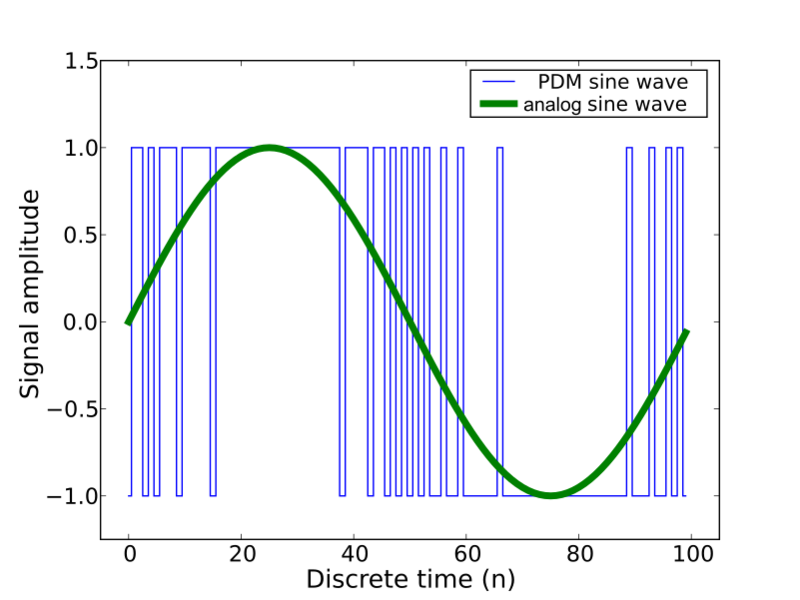

Since the analogue signals can be quantized to only 2 discrete values (0 or 1), the microphones must sample at a frequency range of 1 - 3 MHz to ensure sufficient fidelity in signal reconstruction. In light of this, it was necessary to explore whether there was sufficient clockspace on the RPi Zero W to dedicate to the VM3000 microphone without impeding other function. The RPi Zero W contains a BCM2835 chip which runs at 1 GHz so plenty of clockrate can be dedicated to the VM3000. I found other MEMS microphones on the market which have successfully interfaced with the Pi Zero using the I2S audio stream, however the use of Pulse Density Modulation MEMS microphones with RPis were not well documented.

Further research into the BCM2835 chip indicated that the Pi Zero W can read the PDM data from the microphones using the I2S interface, however the PDM Input Mode needs to be enabled on the board's MODE_A Register as it defines the Pulse-Code Modulation (PCM) Operating Mode. Useful links to this topic can be found below:

 - https://www.raspberrypi.org/app/uploads/2012/02/BCM2835-ARM-Peripherals.pdf - BCM2835 SoC Datasheet
 - https://www.raspberrypi.org/forums/viewtopic.php?f=44&t=8496 - Sticky thread on interfacing microphones with RPi's I2S port, some discussion on PDM interfacing
 - https://www.digikey.si/product-detail/en/knowles/SPH0641LU4H-1/423-1402-1-ND/5332430 - Another PDM microphone which a user on the sticky thread has successfuly used for PDM interfacing

<b> As of 14/08/2020, the next steps in interfacing the VM3000 to the RPi are: </b>
 - Interface with a PCM microphone which uses I2S to ensure I2S drivers are installed and functional (Currently Adafruit I2S MEMS Microphone Breakout - SPH0645LM4H has been ordered)
 - Recompile I2S library
 - Check PCM microphone is still working
 - Reconfigure library to enable PDM mode
 - Recompile
 - Test with PDM microphone
 
 


## Progress Update 3 - 27/08/2020

### PDM Microphone Software and Hardware setup 

A user on GitHub has provided a 'getting started' guide on setting up an I2S microphone on RPis: 
https://github.com/Infineon/GetStarted_IM69D130_With_RaspberryPi. 

<b> Alternatively, adafruit has a script available which automatically compiles the I2S module, see the "Raspberry Pi Wiring & Test" </b>
https://learn.adafruit.com/adafruit-i2s-mems-microphone-breakout/raspberry-pi-wiring-test. Follow this guide yielded the following breadboard circuit:

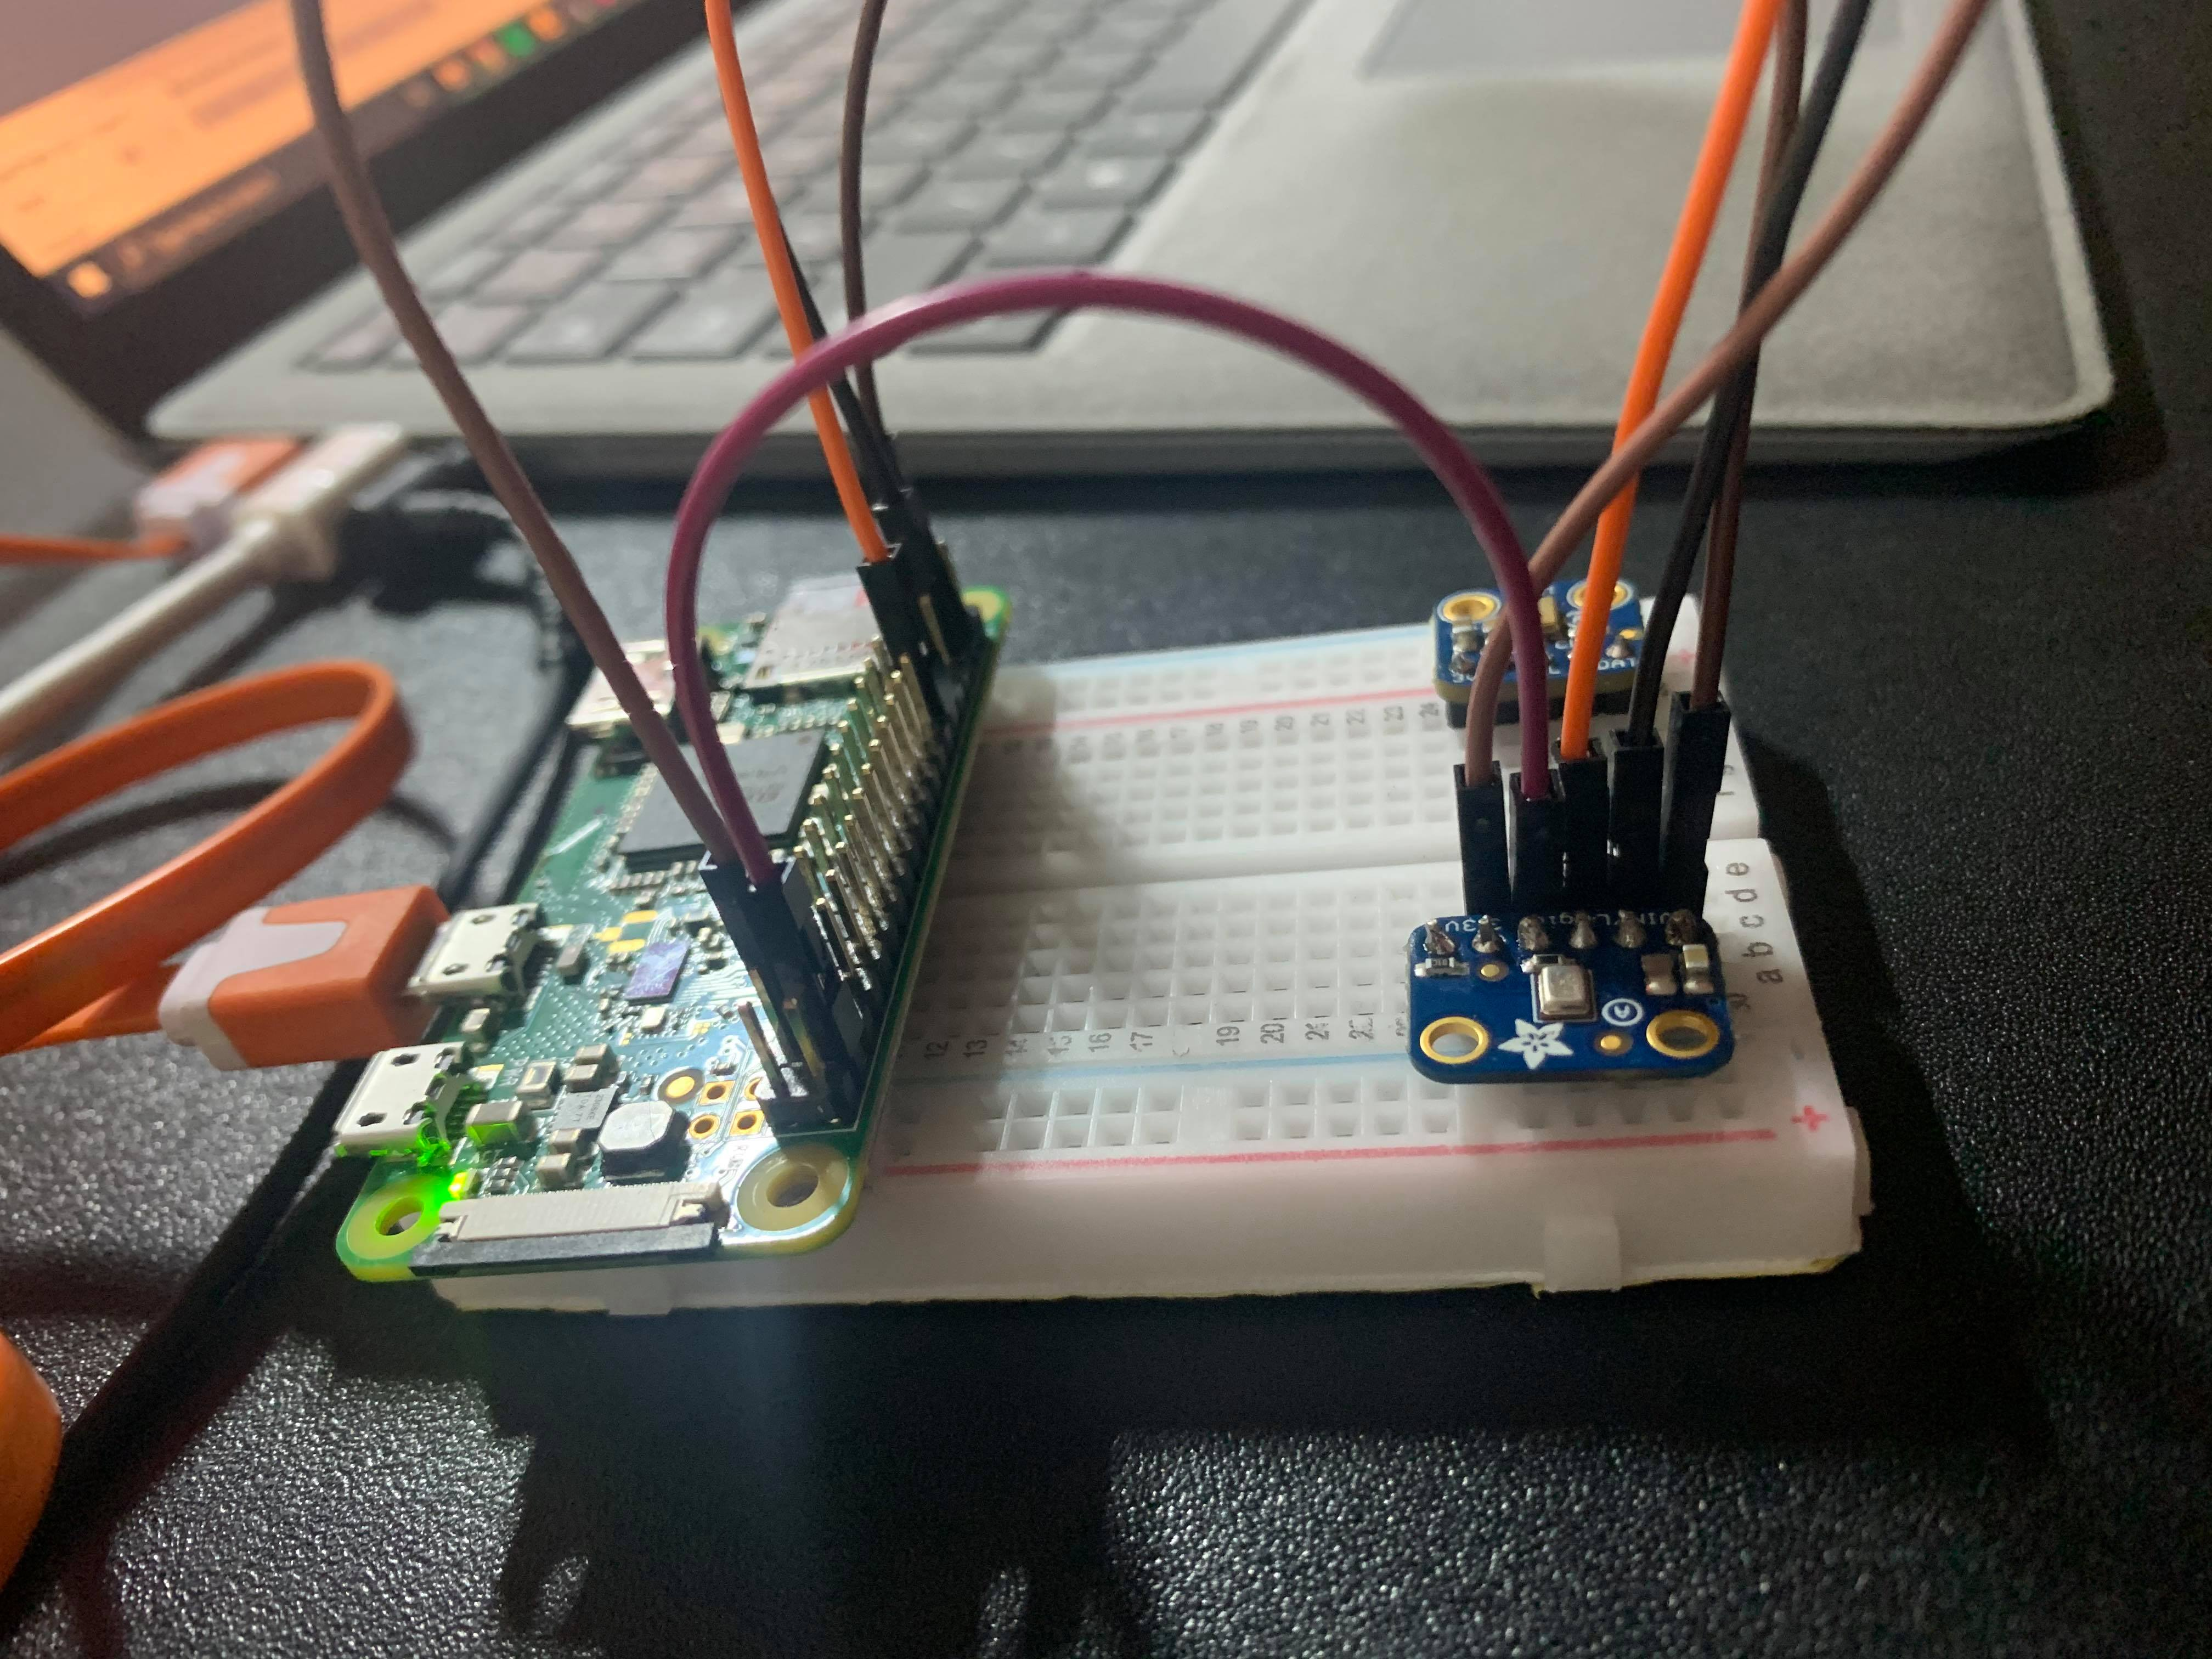

Note that the uppermost pinout on the breakout is not connected as that is used for stereo (2 microphone) mode, here we are only using mono (1 microphone). Audio was recorded from this microphone using the 'arecord' command, details for which are found here: https://linux.die.net/man/1/arecord

$ arecord -D plughw:1 -c1 -r 48000 -f S32_LE -t wav -V mono -v -d 10 testing.wav

Breaking down this command:
 - -D plughw:1 (Selects the microphone by name, plughw:1 is the device name found using $ arecord -l)
 - -c1 (Selects a single channel, this can vary from 1 to 32)
 - r 48000 (Specifies the sampling rate, default is 8kHz but values are valid from 2kHz to 192kHz)
 - f S32_LE (Selects the sampling format)
 - t wav (Selects output file type, here we have selected the .wav format)
 - V mono (Selects mono audio type since we are only using 1 microphone, if using 2 select '-V stereo')
 - v (Verbose to show structure and setup whilst command is running)
 - d 10 (Specifies duration to record in seconds)
 - testing.wav (Specified filename which will be saved onto the RPi once the 10s duration elapses)
 
<b> File transfer from Raspberry Pi to PC </b>
To visualise the 'testing.wav' audio file acquired by the microphone and RPi, WinSCP was used as a file transfer software. It is a free and open-source software which offers secure file transfer between a local and remote computer, the following download link as used: https://winscp.net/eng/download.php. The software simply logs into the RPi through SSH (user and password required), and presents a simply drag-and-drop interface between the RPi and the PC.

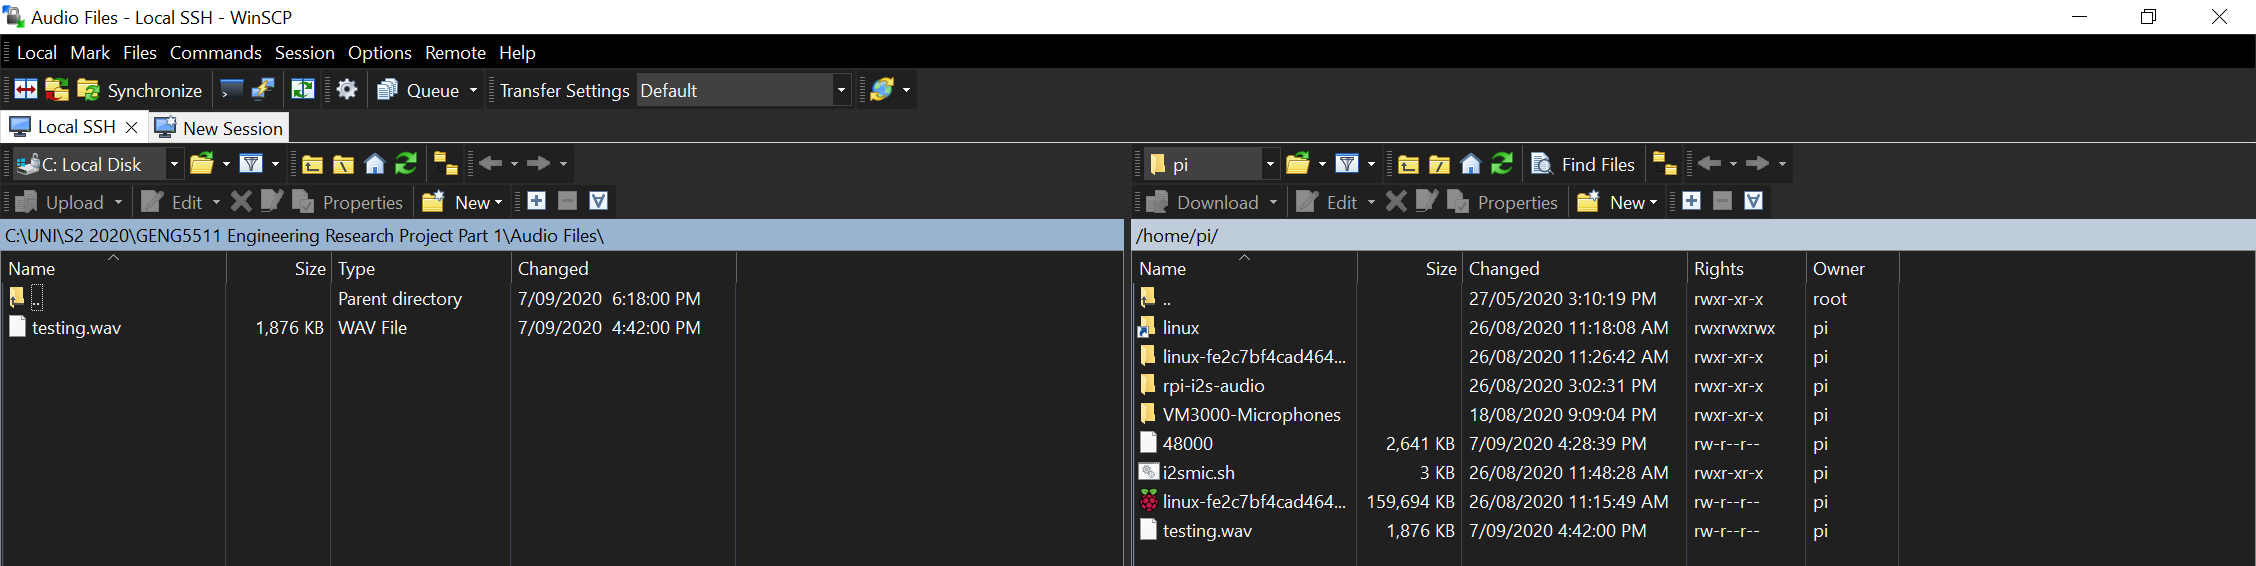

The local .wav file was then opened in Audacity which is a free, open-source digital audio editor and recording software (Download link: https://www.audacityteam.org/download/). The recored audio profile can be seen below:

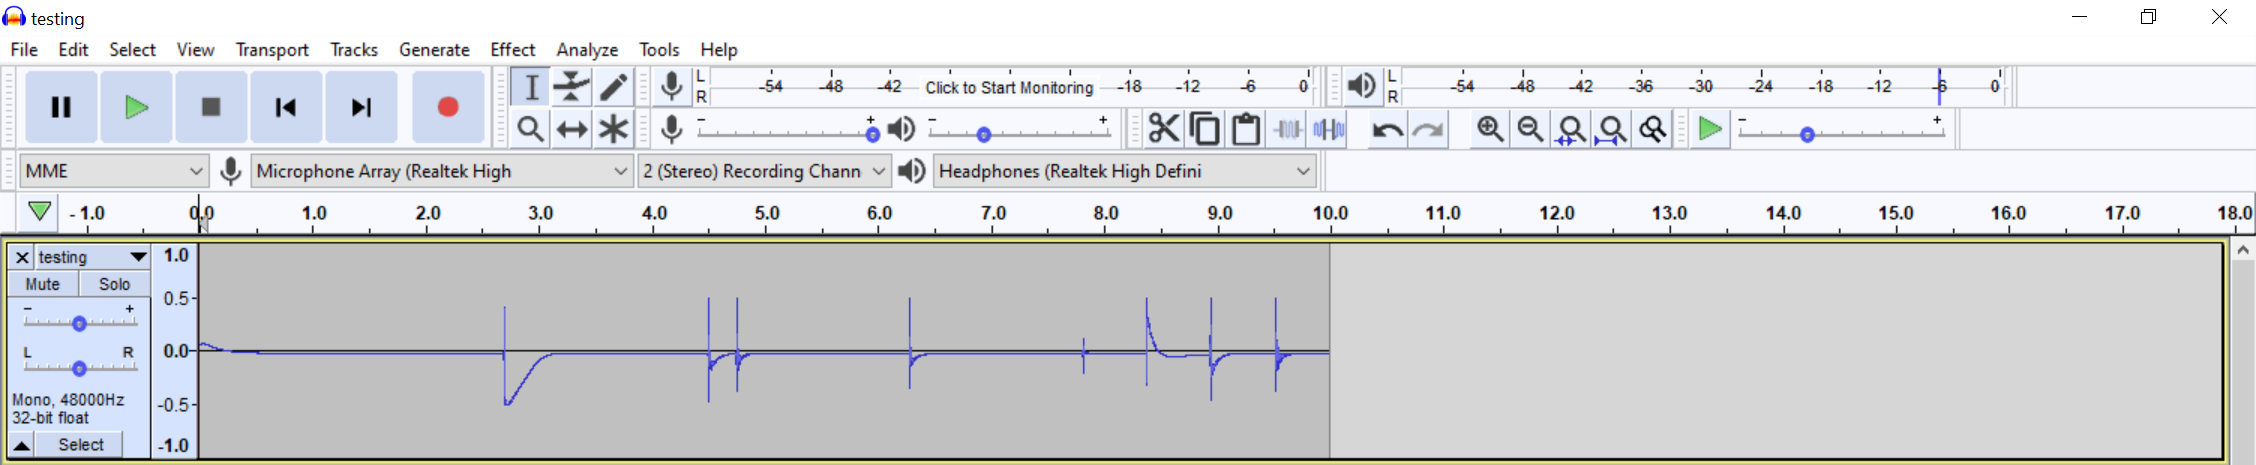

Once the I2S driver has been setup on the RPi, the next step is to enable PDM mode - see the following thread:
https://www.raspberrypi.org/forums/viewtopic.php?f=44&t=8496&hilit=PDM+SPH0641LU4H+1&sid=caf3bbeb363ecf6ebcfa33a2d872295b&start=925. This involves enabling the RPi to read PDM input data by uncommenting PDMN and PDME in the bcm2835-i2s.c file which can be found in ~/linux/sound/soc/bcm. The I2S microphone was then tested again with the PDM enabled and there was no identifiable issues acquiring sound. The bclk_rate has also been fixed to 3.072MHz after line 380 in bcm2835-i2s.c.

The PDM MEMS Microphone Breakout will be setup using the following: https://learn.adafruit.com/adafruit-pdm-microphone-breakout/overview:


### Beamforming Algorithms

Several Python beamforming packages are available online, below are links to a few of them (note I have yet not chosen which one to use):
 - https://pypi.org/project/pyargus/ (DOA algorithm)
 - https://pypi.org/project/acoular/
 - https://github.com/LCAV/pyroomacoustics (Delay and Sum Algorithm)
 
Useful guide explain concept of delay and sum beamforming on Python:
https://nrr.mit.edu/sites/default/files/documents/Conventional%20Beamforming%20-%20Introduction.html
    

### Digital Microphone Array PCB Design

WIP